In [20]:
import matplotlib.pyplot as plt
words = open('names.txt', 'r').read().splitlines()

In [21]:
words[:10]
min(len(w) for w in words)

2

In [22]:
for w in words[:3]:
    chs = ['<S>'] + list(w) + ['<E>'] # introduce special start and end characters
    for ch1, ch2 in zip(w, w[1:]):
        print(ch1,ch2)

e m
m m
m a
o l
l i
i v
v i
i a
a v
v a


In [23]:
# bigram model of above

b = {} #dictionary
for w in words:
    # chs = ['<S>'] + list(w) + ['<E>']
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
       bigram = (ch1, ch2)
       b[bigram] = b.get(bigram, 0) + 1
sorted(b.items(), key = lambda kv: -kv[1]) # sorts the dictionary by key value at space 1 (default is 0)

[(('n', '.'), 6763),
 (('a', '.'), 6640),
 (('a', 'n'), 5438),
 (('.', 'a'), 4410),
 (('e', '.'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('.', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('.', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '.'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('.', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '.'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('.', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '.'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('.', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('.', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('.', 'l'), 1572),
 (('.', 'c'), 1542),
 (('.', 'e'), 1531),
 (('j', 'a'), 1473),
 (('r', '.'), 1377),
 (('n', 'e'),

In [24]:
import torch

In [25]:
N = torch.zeros((28,28), dtype=torch.int32) # 28x28 array of zeros 


In [26]:
# joining all words into one long list, removing duplicates, 
# sorting them, and then converting them into a list of characters

chars = sorted(list(set(''.join(words)))) # set of all characters in the words
char2int = {ch:i+1 for i,ch in enumerate(chars)} # dictionary of characters to integers
# char2int['<S>'] = 26
# char2int['<E>'] = 27 # start and end characters
char2int['.'] = 0
char2int
int2char = {i:ch for ch,i in char2int.items()} # dictionary of integers to characters

In [27]:
# filling the tensor with the counts of bigrams
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = char2int[ch1]
        ix2 = char2int[ch2]
        N[ix1, ix2] += 1

In [28]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929,    0], dtype=torch.int32)

In [29]:
# converting first row to probabilities
p = N[0].float()
p = p / p.sum( )
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290,
        0.0000])

In [30]:
g = torch.Generator().manual_seed(2147483647)

# generating names based on bigram model using probability distribution
for i in range(50):
    out = []
    ix = 0 # set index
    while True:
        p = N[ix].float() # convert that row in tensor to float
        p = p / p.sum() # convert to probabilities
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item() # sample from the multinomial distribution
        out.append(int2char[ix])
        if ix ==0:
            break
    print(' '.join(out))

j u n i d e .
j a n a s a h .
p .
c o n y .
a .
n n .
k o h i n .
t o l i a n .
j u e e .
k s a h n a a u r a n i l e v i a s .
d e d a i n r w i e t a .
s s o n i e l y l a r t e .
f a v e u m e r i f o n t u m e .
p h y n s l e n a r u a n i .
c o r e .
y a e n o n .
k a .
j a b d i n e r i m i k i m a y n i n .
a n a a s n .
s s o r i o n s u s h .
d g o s s m i t a n .
i l .
l e .
p a n n .
t h a t .
j a n r e l i .
i s a .
d y n .
r i j e l u m e m a h a u n a y a l e v a .
c a r a r r .
j e n .
j a n a r t a .
m a l y .
a b e l y .
a .
i .
l a v a d o n i .
t h e m i e l y a w a t .
f .
m o d a m .
t a v i l i t i k i e s a l o e v e r i n .
n .
e .
k a l b r e n e l a h .
a n e n .
c h .
k .
j a n .
o d r i d r d e n a n i a l i l p e r g h a .
t e z r a l e l i a .


In [31]:
# make more efficient by building probability tensor before
P = N.float()
P /= P.sum(1, keepdim=True) # normalising by sum of rows
# note the /= improves efficiency by not creating a new tensor

P[0].sum() # proving sum is still 1

# broadcasting to divide each row by the sum of the row
# 27, 27
# 27, 1 



tensor(1.)

In [32]:
# more efficient verson of name generation using predefined probabiltiy tensor
g = torch.Generator().manual_seed(2147483647)

# generating names based on bigram model using probability distribution
for i in range(50):
    out = []
    ix = 0 # set index
    while True:
        p = P[ix] # selecting probability row from tensor
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item() # sample from the multinomial distribution
        out.append(int2char[ix])
        if ix ==0:
            break
    print(' '.join(out))

j u n i d e .
j a n a s a h .
p .
c o n y .
a .
n n .
k o h i n .
t o l i a n .
j u e e .
k s a h n a a u r a n i l e v i a s .
d e d a i n r w i e t a .
s s o n i e l y l a r t e .
f a v e u m e r i f o n t u m e .
p h y n s l e n a r u a n i .
c o r e .
y a e n o n .
k a .
j a b d i n e r i m i k i m a y n i n .
a n a a s n .
s s o r i o n s u s h .
d g o s s m i t a n .
i l .
l e .
p a n n .
t h a t .
j a n r e l i .
i s a .
d y n .
r i j e l u m e m a h a u n a y a l e v a .
c a r a r r .
j e n .
j a n a r t a .
m a l y .
a b e l y .
a .
i .
l a v a d o n i .
t h e m i e l y a w a t .
f .
m o d a m .
t a v i l i t i k i e s a l o e v e r i n .
n .
e .
k a l b r e n e l a h .
a n e n .
c h .
k .
j a n .
o d r i d r d e n a n i a l i l p e r g h a .
t e z r a l e l i a .


In [33]:
# Evaluating performance of model using log-loss method
# this is buggy if it has to evaluate any pair of characters that are not in the training set
# as the probability will be 0
# To overcome this you add a small value to the probability to avoid log(0) (e.g. P[ix1, ix2] + 1)

log_likelihood = 0
n = 0

for w in words[:10]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = char2int[ch1]
        ix2 = char2int[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n+=1
        print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood:.4f}')
nll = -log_likelihood
print(f'{nll/n}')

.e: 0.0478 -3.0408
em: 0.0377 -3.2793
mm: 0.0253 -3.6772
ma: 0.3899 -0.9418
a.: 0.1960 -1.6299
.o: 0.0123 -4.3982
ol: 0.0780 -2.5508
li: 0.1777 -1.7278
iv: 0.0152 -4.1867
vi: 0.3541 -1.0383
ia: 0.1381 -1.9796
a.: 0.1960 -1.6299
.a: 0.1377 -1.9829
av: 0.0246 -3.7045
va: 0.2495 -1.3882
a.: 0.1960 -1.6299
.i: 0.0184 -3.9927
is: 0.0743 -2.5990
sa: 0.1482 -1.9094
ab: 0.0160 -4.1373
be: 0.2476 -1.3958
el: 0.1590 -1.8386
ll: 0.0964 -2.3397
la: 0.1879 -1.6717
a.: 0.1960 -1.6299
.s: 0.0642 -2.7465
so: 0.0655 -2.7256
op: 0.0120 -4.4250
ph: 0.1988 -1.6153
hi: 0.0957 -2.3463
ia: 0.1381 -1.9796
a.: 0.1960 -1.6299
.c: 0.0481 -3.0337
ch: 0.1880 -1.6713
ha: 0.2946 -1.2220
ar: 0.0963 -2.3400
rl: 0.0325 -3.4259
lo: 0.0496 -3.0042
ot: 0.0149 -4.2082
tt: 0.0671 -2.7009
te: 0.1285 -2.0515
e.: 0.1950 -1.6346
.m: 0.0792 -2.5354
mi: 0.1891 -1.6655
ia: 0.1381 -1.9796
a.: 0.1960 -1.6299
.a: 0.1377 -1.9829
am: 0.0482 -3.0319
me: 0.1232 -2.0943
el: 0.1590 -1.8386
li: 0.1777 -1.7278
ia: 0.1381 -1.9796
a.: 0.1960 -

In [34]:
# write in a better neural network type way

# create training set of all bigrams

# xs are input to neurons, ys are the target outputs (i.e. next letter)
xs, ys = [], []
for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = char2int[ch1]
        ix2 = char2int[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs) # note lower case tensor not Tensor because it keeps the same data type
ys = torch.tensor(ys)

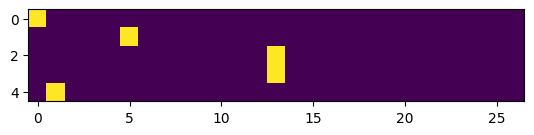

In [35]:
import torch.nn.functional as F
# one hot encoding (google it)
#basically ir creates a tensor of zeros with a 1 in the position of the character
xenc = F.one_hot(xs, num_classes=27).float() # need float to feed NN
plt.imshow(xenc)

In [36]:
### FORWARD PASS ###

# 27 x 27 matrix from normal distribution
W = torch.randn((27, 27), requires_grad=True) # requires_grad=True means we can differentiate through this tensor

# matrix multiplication using @ 
# interpret output of multiplication as log counts
logits = (xenc @ W)
counts = logits.exp() # equivalent to the N matrix of counts from before
probs = counts / counts.sum(1, keepdim=True) # normalising by sum of row

In [37]:
# Can find loss function

loss = - probs[torch.arange(5), ys].log().mean()


In [38]:
### BACKWARD PASS ###
W.grad = None # zero the gradients
loss.backward() # backpropagate

---- Optimisation ---

In [54]:
# create dataset
xs, ys = [], []
for w in words[:1000]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = char2int[ch1]
        ix2 = char2int[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs) 
ys = torch.tensor(ys)
num =xs.nelement()

# Initialise the 'network' (i.e. the matrix W)
# g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), requires_grad=True)


In [55]:
# gradienst descent
for k in range(1000):

    #forward pass
    xenc = F.one_hot(xs, num_classes=27).float()
    logits = (xenc @ W)
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdim=True)
    loss = - probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean() 
    # 0.01(W**2).mean() is a regularisation term to prevent overfitting

    #backward pass
    W.grad = None
    loss.backward()

    #update weights
    W.data += -1 * W.grad

    print(loss.item())

3.8549063205718994
3.8394389152526855
3.8243095874786377
3.809495449066162
3.7949752807617188
3.7807304859161377
3.7667458057403564
3.7530040740966797
3.739492416381836
3.726198673248291
3.713111162185669
3.7002201080322266
3.6875171661376953
3.6749932765960693
3.662641763687134
3.6504549980163574
3.6384284496307373
3.626555919647217
3.614832639694214
3.6032533645629883
3.591815710067749
3.580514907836914
3.5693488121032715
3.558314085006714
3.547407388687134
3.5366272926330566
3.5259716510772705
3.5154383182525635
3.505025625228882
3.4947316646575928
3.484556198120117
3.4744975566864014
3.4645543098449707
3.454725742340088
3.4450109004974365
3.4354097843170166
3.4259204864501953
3.4165432453155518
3.407277822494507
3.398123025894165
3.389078140258789
3.380143642425537
3.3713185787200928
3.362603187561035
3.3539958000183105
3.3454973697662354
3.337106227874756
3.3288228511810303
3.320646286010742
3.31257700920105
3.3046131134033203
3.2967545986175537
3.289000988006592
3.281352519989013

In [56]:
g = torch.Generator().manual_seed(2147483647)

# generating names based on bigram model using probability distribution
for i in range(10):
    out = []
    ix = 0 # set index

    while True:
        # p = P[ix] # selecting probability row from tensor
        
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = (xenc @ W)
        counts = logits.exp()
        p = counts / counts.sum(1, keepdims=True)
        
        
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item() # sample from the multinomial distribution
        out.append(int2char[ix])

        if ix ==0:
            break
    print(' '.join(out))

j u w j d e .
j a n a q a h .
p x c f k y .
a .
b e .
k a i .
r l t o l i a .
s a t e e .
k a l a n a d u y a n i l e v i a c e d b d a i n r w i e .
l e s e j y .
